# Cross-validation

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X,y, random_state = 0,
                                 train_size = 0.5)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors =1)
model.fit(X1,y1)
y_model = model.predict(X2)

from sklearn.metrics import accuracy_score
accuracy_score(y2, y_model)


0.9066666666666666

## k-fold Cross-validation

In [2]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv =5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

## LeaveOneOut

In [3]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv = LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
scores.mean()

0.96

# Selecting the best model 

## Validation curve 

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [12]:
import numpy as np
def make_data(N ,err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1)**2
    y = 10 - 1./(X.ravel()+0.1)
    if err > 0:
        y += err*rng.randn(N)
    return X, y 
X, y = make_data(40)

ValueError: illegal value in 4-th argument of internal None

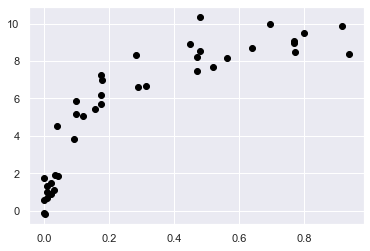

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
x_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y , color = 'black')
#axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(x_test)
    plt.plot(x_test, y_test, label = 'degree={0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc = 'best');

In [9]:
X
y.reshape(-1,1).shape



(40, 1)

D:\ANACONDA\envs\venv\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
D:\ANACONDA\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ANACONDA\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ANACONDA\envs\venv\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\ANACONDA\envs\venv\lib\site-packages\sklearn\linear_model\

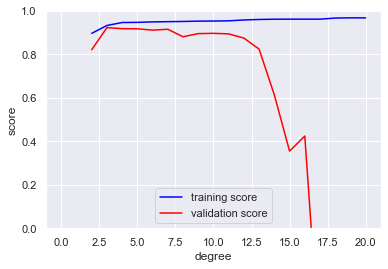

In [10]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
#degree.reshape(-1,1)
#X.reshape(-1,1)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                         'polynomialfeatures__degree', degree, cv = 7)
plt.plot(degree, np.median(train_score,1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score,1), color = 'red', label ='validation score')
plt.legend(loc = 'best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score');

In [33]:
PolynomialRegression().get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'polynomialfeatures', 'linearregression', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

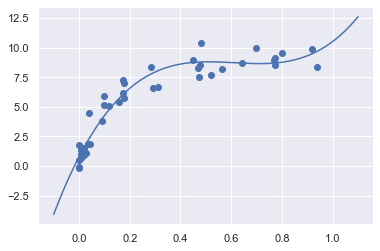

In [20]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X,y).predict(x_test)
plt.plot(x_test.ravel(), y_test);


## Learning curves

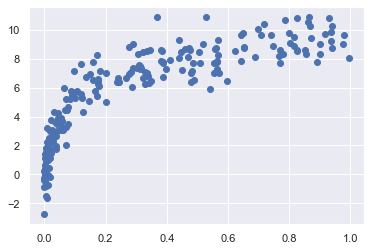

In [22]:
X2, y2 = make_data(200)
plt.scatter(X2, y2)

D:\ANACONDA\envs\venv\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0, 0.5, 'score')

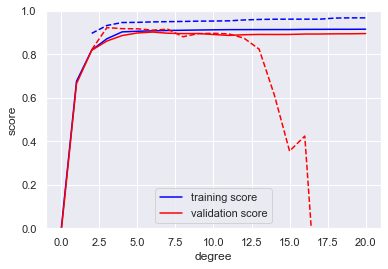

In [25]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                           'polynomialfeatures__degree', degree, cv =7)
plt.plot(degree, np.median(train_score2,1),color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score2,1), color = 'red', label = 'validation score')
plt.plot(degree, np.median(train_score, 1), color = 'blue', linestyle = 'dashed')
plt.plot(degree, np.median(val_score,1), color = 'red', linestyle = 'dashed')
plt.legend(loc = 'lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

D:\ANACONDA\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ANACONDA\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ANACONDA\envs\venv\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\ANACONDA\envs\venv\lib\site-packages\sklearn\linear_model\_base.py", line 547, in fit
    linalg.lstsq(X, y)
  File "D:\ANACONDA\envs\venv\lib\site-packages\scipy\linalg\basic.py", line 1221, in lstsq
    raise LinAlgError("SVD did not converge in Linear Least Squares")
numpy.linalg.LinAlgError: SVD did not converge in Linear Least Squares

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\ANACONDA\e

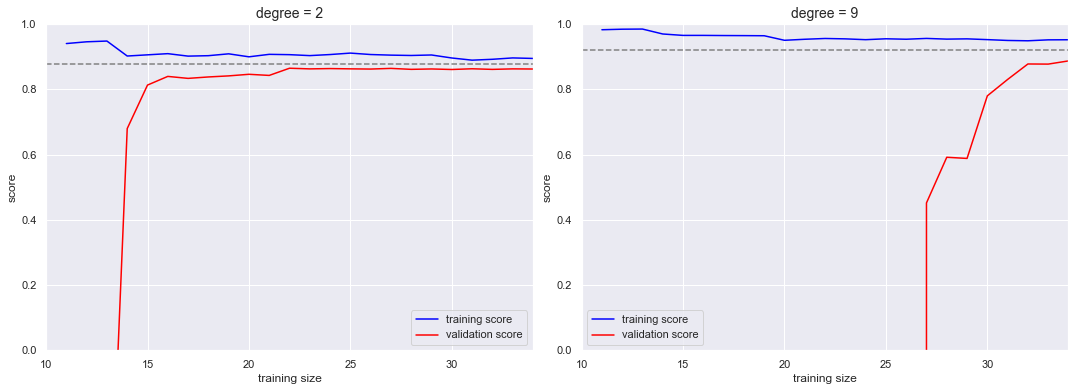

In [28]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1,2, figsize = (16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2,9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X ,y, cv =7, 
                                        train_sizes = np.linspace(0.3,1,25))
    ax[i].plot(N, np.mean(train_lc, 1), color = 'blue', label = 'training score')
    ax[i].plot(N, np.mean(val_lc, 1), color = 'red', label = 'validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color = 'grey', linestyle ='dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree),size =14)
    ax[i].legend(loc = 'best')

## Grid search 

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree':np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize':[True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)

In [31]:
grid.fit(X,y)

D:\ANACONDA\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ANACONDA\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ANACONDA\envs\venv\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\ANACONDA\envs\venv\lib\site-packages\sklearn\linear_model\_base.py", line 547, in fit
    linalg.lstsq(X, y)
  File "D:\ANACONDA\envs\venv\lib\site-packages\scipy\linalg\basic.py", line 1223, in lstsq
    raise ValueError('illegal value in %d-th argument of internal %s'
ValueError: illegal value in 4-th argument of internal None

  warnings.warn("Estimator fit failed. The score on this train-test"


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [33]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

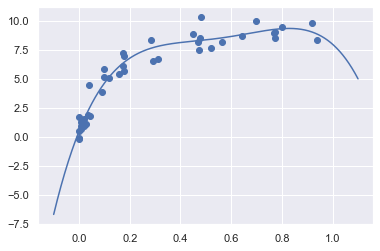

In [38]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)

y_test = model.fit(X,y).predict(x_test)
plt.plot(x_test.ravel(), y_test)
